In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRFClassifier

pd.set_option('display.max_rows', None)


In [152]:
csv_file1 = "../Phase_2_data/data/database_IND.csv"
csv_file2 = "../Phase_2_data/data/database_USA.csv"
csv_file3 = "../Phase_2_data/data/database_AUS.csv"

# Read each CSV file into a DataFrame
df1 = pd.read_csv(csv_file1)
df2 = pd.read_csv(csv_file2)
df3 = pd.read_csv(csv_file3)

# Concatenate the DataFrames row-wise
combined_df = pd.concat([df1, df2, df3], ignore_index=True)

# Print the combined DataFrame (optional)
# print(combined_df)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('../Phase_2_data/data/combined_output.csv', index=False)

In [153]:
data=pd.read_csv("../Phase_2_data/data/combined_output.csv")

In [154]:
print('Data Shape:',data.shape)

Data Shape: (13298, 27)


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

In [156]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [157]:
data=data.drop(columns=['name', 'country_long','gppd_idnr','url','owner', 'source',
                            'other_fuel1', 'other_fuel2','other_fuel3',
                            'wepp_id','estimated_generation_gwh'],axis=1)

In [158]:
data.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,13292.000000,13220.000000,13220.000000,10654.000000,12860.0,7170.000000,7534.000000,7993.000000,8701.000000,9292.000000,9858.000000
mean,117.738717,35.053213,-73.794217,1998.184904,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016
std,347.169038,15.444195,62.868834,24.017781,0.0,2030.523760,2193.172655,2148.167470,2050.411295,2001.411908,1963.485305
min,0.000000,-42.888300,-171.712400,1896.000000,2019.0,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000
25%,1.500000,33.901700,-104.659875,1988.000000,2019.0,1.653075,2.018000,2.140000,2.108000,2.063750,2.141250
50%,5.500000,38.389750,-87.346000,2008.000000,2019.0,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500
75%,52.725000,42.175125,-75.475925,2015.000000,2019.0,185.326498,217.069500,200.279000,173.348004,157.889688,149.141249
max,6809.000000,425.246100,153.434100,2020.000000,2019.0,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000


C:\Users\kulsr\AppData\Local\Temp\ipykernel_32892\1438537765.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data, x='capacity_mw',fill=True,  palette='Set2')


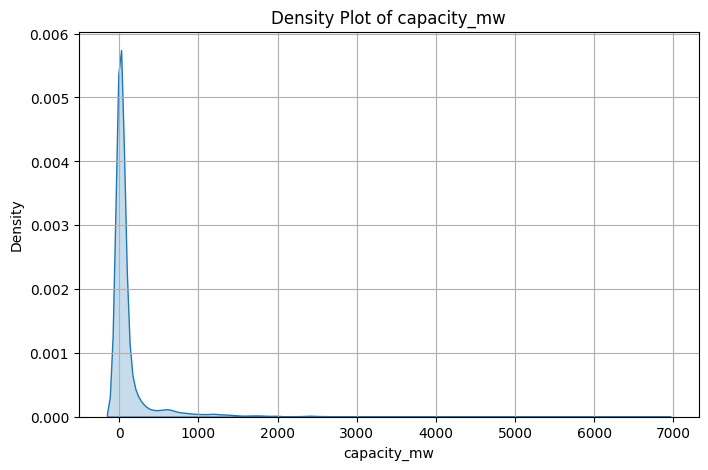

In [159]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data, x='capacity_mw',fill=True,  palette='Set2')
plt.title('Density Plot of capacity_mw')
plt.xlabel('capacity_mw')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  object 
 1   capacity_mw             13292 non-null  float64
 2   latitude                13220 non-null  float64
 3   longitude               13220 non-null  float64
 4   primary_fuel            11294 non-null  object 
 5   commissioning_year      10654 non-null  float64
 6   geolocation_source      13275 non-null  object 
 7   year_of_capacity_data   12860 non-null  float64
 8   generation_gwh_2013     7170 non-null   float64
 9   generation_gwh_2014     7534 non-null   float64
 10  generation_gwh_2015     7993 non-null   float64
 11  generation_gwh_2016     8701 non-null   float64
 12  generation_gwh_2017     9292 non-null   float64
 13  generation_gwh_2018     9858 non-null   float64
 14  generation_gwh_2019     9778 non-null 

In [161]:
data['country'].value_counts()

USA    11879
IND      907
AUS      512
Name: country, dtype: int64

In [162]:
data['primary_fuel'].value_counts()

Solar           3480
Gas             2031
Hydro           1783
Wind            1340
Oil              961
Waste            595
Coal             572
Biomass          230
Storage          104
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: primary_fuel, dtype: int64

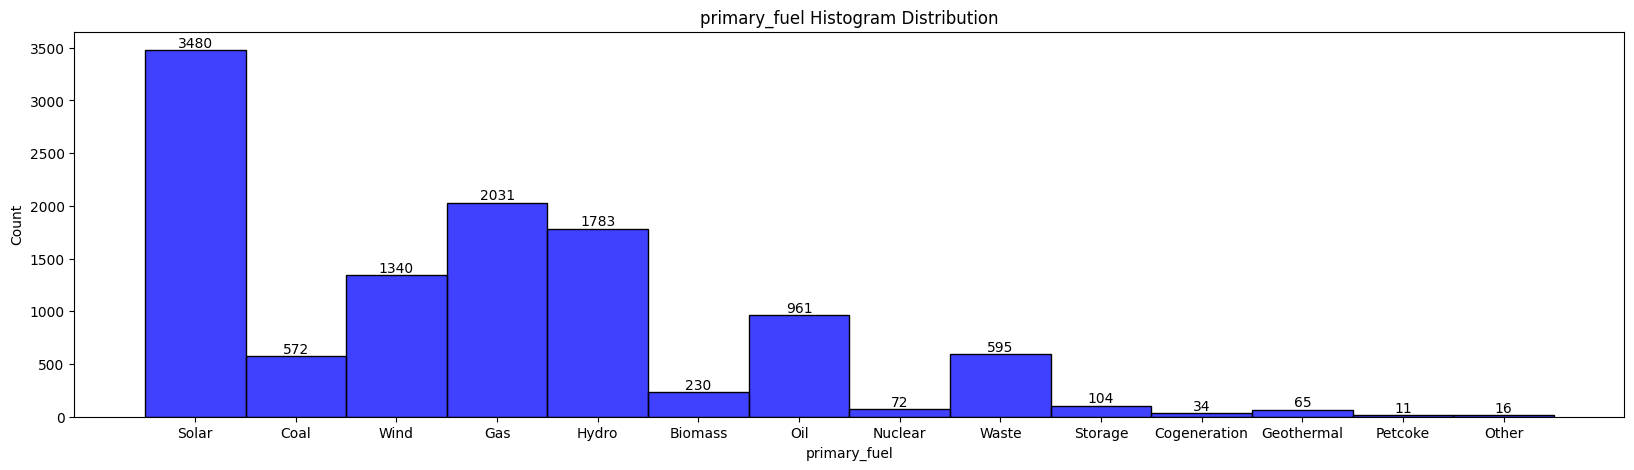

In [163]:
plt.figure(figsize=(20, 5))
ax = sns.histplot(x=data['primary_fuel'], color='blue')
labels = [str(v) if v else '' for v in ax.containers[0].datavalues]
ax.bar_label(ax.containers[0], labels=labels)
# plt.xlabel('region')
plt.title('primary_fuel Histogram Distribution')
plt.show()

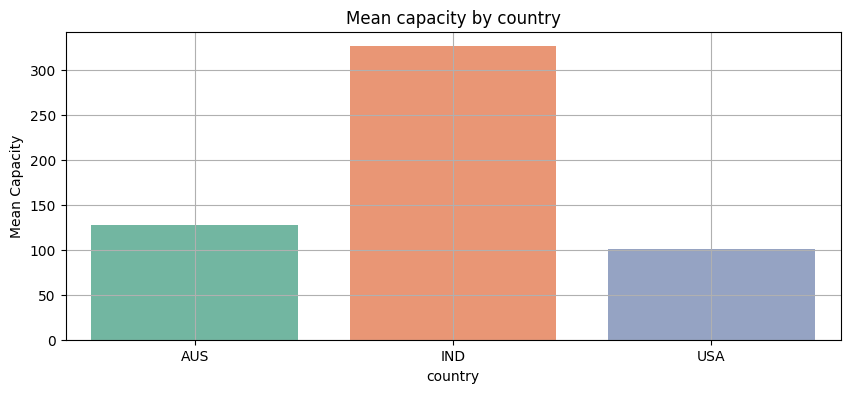

In [164]:
mean_charges = data.groupby(['country'])['capacity_mw'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 4))
sns.barplot(data=mean_charges, x='country', y='capacity_mw', palette='Set2')
plt.title('Mean capacity by country')
plt.xlabel('country')
plt.ylabel('Mean Capacity')
plt.grid(True)
plt.show()

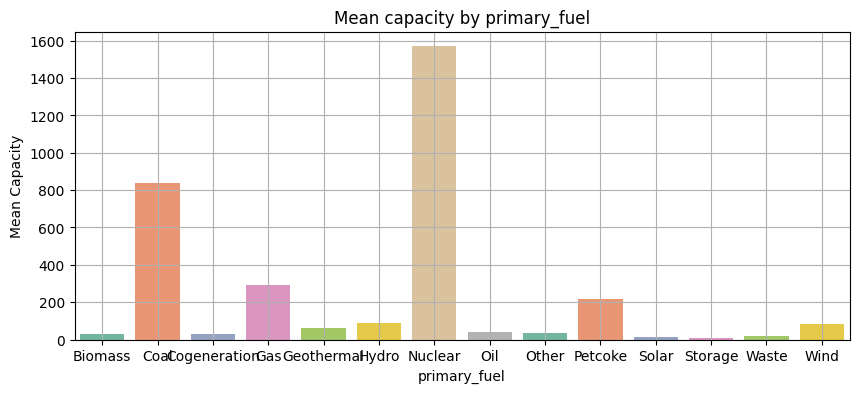

In [165]:
mean_charges = data.groupby(['primary_fuel'])['capacity_mw'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 4))
sns.barplot(data=mean_charges, x='primary_fuel', y='capacity_mw', palette='Set2')
plt.title('Mean capacity by primary_fuel')
plt.xlabel('primary_fuel')
plt.ylabel('Mean Capacity')
plt.grid(True)
plt.show()

In [166]:
# Nuculear power dominates along with coal

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  object 
 1   capacity_mw             13292 non-null  float64
 2   latitude                13220 non-null  float64
 3   longitude               13220 non-null  float64
 4   primary_fuel            11294 non-null  object 
 5   commissioning_year      10654 non-null  float64
 6   geolocation_source      13275 non-null  object 
 7   year_of_capacity_data   12860 non-null  float64
 8   generation_gwh_2013     7170 non-null   float64
 9   generation_gwh_2014     7534 non-null   float64
 10  generation_gwh_2015     7993 non-null   float64
 11  generation_gwh_2016     8701 non-null   float64
 12  generation_gwh_2017     9292 non-null   float64
 13  generation_gwh_2018     9858 non-null   float64
 14  generation_gwh_2019     9778 non-null 

In [209]:
data_reg=data.copy()
data_cla=data.copy()

In [210]:
label_encoder_geolocation_source= preprocessing.LabelEncoder() 
label_encoder_primary_fuel= preprocessing.LabelEncoder() 
label_encoder_country= preprocessing.LabelEncoder() 
label_encoder_datasource = preprocessing.LabelEncoder() 



data_reg['generation_data_source']= label_encoder_datasource.fit_transform(data_reg['generation_data_source']) 
data_reg['country']= label_encoder_country.fit_transform(data_reg['country']) 
data_reg['primary_fuel']= label_encoder_primary_fuel.fit_transform(data_reg['primary_fuel']) 
data_reg['geolocation_source']= label_encoder_geolocation_source.fit_transform(data_reg['geolocation_source']) 


## Regression Model

In [211]:
print('Data before Outlier Detection ',data_reg.shape)
Q1 = data_reg['capacity_mw'].quantile(0.25)
Q3 = data_reg['capacity_mw'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_reg = data_reg[(data_reg['capacity_mw'] >= lower_bound) & (data_reg['capacity_mw'] <= upper_bound)]
print('Data After Outlier Detection ',data_reg.shape)


Data before Outlier Detection  (13298, 16)
Data After Outlier Detection  (11177, 16)


In [212]:
data_reg.isna().sum()

country                      0
capacity_mw                  0
latitude                    73
longitude                   73
primary_fuel                 0
commissioning_year        2582
geolocation_source           0
year_of_capacity_data      413
generation_gwh_2013       5663
generation_gwh_2014       5426
generation_gwh_2015       5042
generation_gwh_2016       4395
generation_gwh_2017       3841
generation_gwh_2018       3322
generation_gwh_2019       3058
generation_data_source       0
dtype: int64

In [213]:
data_reg = data_reg.dropna(subset=['latitude'])


In [214]:
data_reg = data_reg.fillna(0)

## Feature Selection

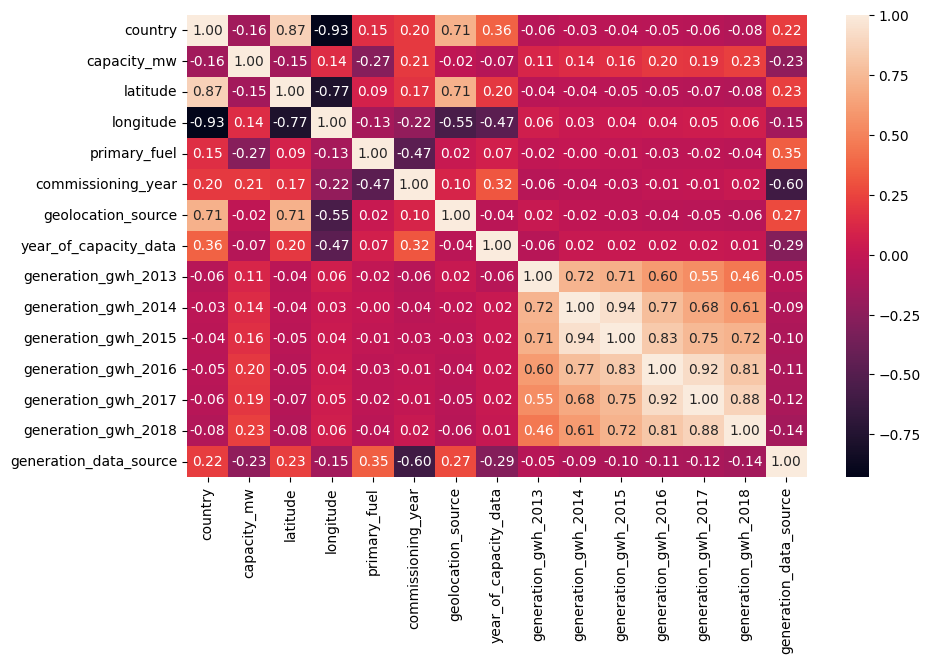

In [215]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(data=data_reg.corr(), annot=True, fmt='.2f')

In [216]:
data_reg.columns

Index(['country', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source'],
      dtype='object')

In [217]:
data_reg=data_reg.drop(columns=['year_of_capacity_data', 'geolocation_source' ],axis=1).copy()

In [218]:
data_reg.duplicated().sum()

26

In [220]:
data_reg = data_reg.drop_duplicates()
data_reg = data_reg.drop(index=302)
data_reg['generation_gwh_2019'] = pd.to_numeric(data_reg['generation_gwh_2019'], errors='coerce')


C:\Users\kulsr\AppData\Local\Temp\ipykernel_32892\3347073372.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=data_reg, x='capacity_mw',fill=True,  palette='Set2')


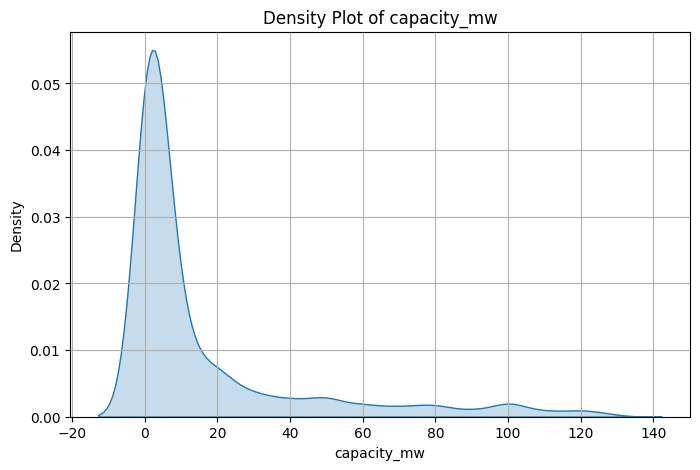

In [221]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=data_reg, x='capacity_mw',fill=True,  palette='Set2')
plt.title('Density Plot of capacity_mw')
plt.xlabel('capacity_mw')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [222]:
X = data_reg.drop('capacity_mw', axis = 1)
y = data_reg['capacity_mw']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

## Taining a Model

In [223]:
def plot_results(test, pred, model_name):
    fig, ax = plt.subplots(figsize=(15, 4))
    x_axis = np.arange(0, test.shape[0], 1)
    sns.lineplot(y=test, x=x_axis, label='Actual', color='mediumblue')
    sns.lineplot(y=pred, x=x_axis, label='Predicted', color='red')
    ax.set(xlabel="Values", ylabel="Target", title=f"{model_name}_Actual_vs_Prediction")
    ax.legend()
    sns.despine()
    plt.show()

In [224]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluation_fn(best_model, X_test_scaled, Y_test, model_name, save_plot=False):
    # Evaluate the model on the test set
    y_pred = best_model.predict(X_test_scaled)
    
    # Calculate regression metrics
    mae = mean_absolute_error(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    rmse = mean_squared_error(Y_test, y_pred, squared=False)
    r2 = r2_score(Y_test, y_pred)
    
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Mean Squared Error (MSE): {mse:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'R-squared (R²): {r2:.2f}')
    
    # Call plotting functions
    plot_results(Y_test, y_pred, model_name)

C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 6.14
Mean Squared Error (MSE): 198.31
Root Mean Squared Error (RMSE): 14.08
R-squared (R²): 0.74


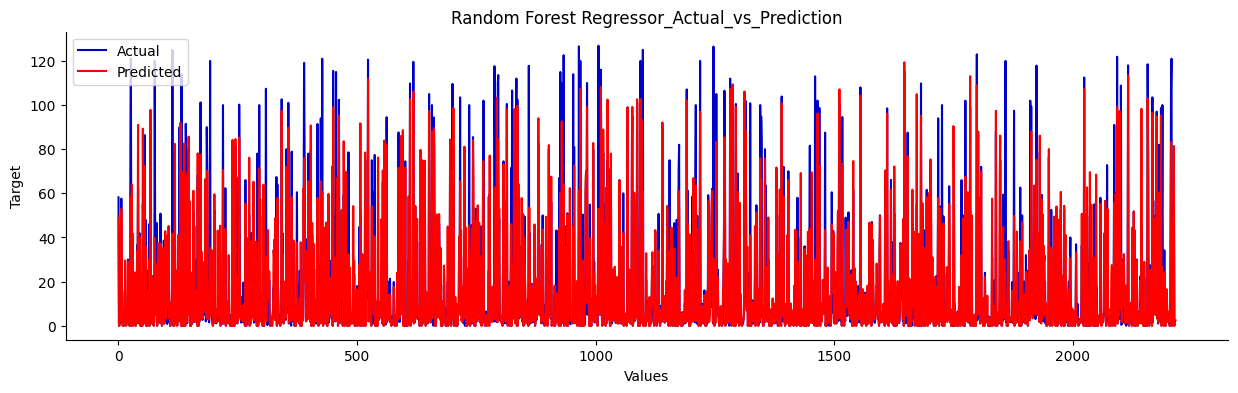

In [225]:
# Model
model = RandomForestRegressor(random_state=19)
model.fit(X_train, Y_train)

# Evaluation
evaluation_fn(model, X_test, Y_test,'Random Forest Regressor')

# Classification Model

In [228]:
label_encoder_geolocation_source= preprocessing.LabelEncoder() 
label_encoder_primary_fuel= preprocessing.LabelEncoder() 
label_encoder_country= preprocessing.LabelEncoder() 
label_encoder_datasource = preprocessing.LabelEncoder() 



data_cla['generation_data_source']= label_encoder_datasource.fit_transform(data_cla['generation_data_source']) 
data_cla['country']= label_encoder_country.fit_transform(data_cla['country']) 
data_cla['primary_fuel']= label_encoder_primary_fuel.fit_transform(data_cla['primary_fuel']) 
data_cla['geolocation_source']= label_encoder_geolocation_source.fit_transform(data_cla['geolocation_source']) 


In [230]:
data_cla.isna().sum()

country                      0
capacity_mw                  6
latitude                    78
longitude                   78
primary_fuel                 0
commissioning_year        2644
geolocation_source           0
year_of_capacity_data      438
generation_gwh_2013       6128
generation_gwh_2014       5764
generation_gwh_2015       5305
generation_gwh_2016       4597
generation_gwh_2017       4006
generation_gwh_2018       3440
generation_gwh_2019       3520
generation_data_source       0
dtype: int64

In [231]:
data_cla = data_cla.dropna(subset=['latitude'])
data_cla = data_cla.fillna(0)

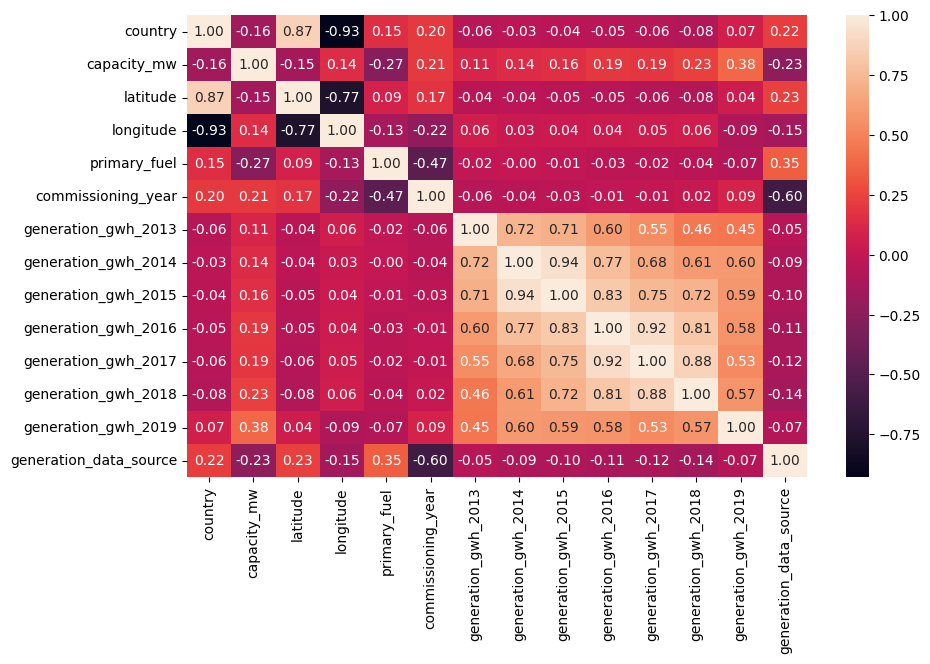

In [232]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(data=data_reg.corr(), annot=True, fmt='.2f')

In [234]:
data_cla.columns

Index(['country', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'geolocation_source', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source'],
      dtype='object')

In [233]:
data_cla = data_cla.drop_duplicates()

In [235]:
data_cla = data_cla.drop(columns=['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019',],axis=1)

In [236]:
X = data_cla.drop('primary_fuel', axis = 1)
y = data_cla['primary_fuel']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=17)

In [237]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluation_fn(best_model, X_test, Y_test):
    
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    f1 = f1_score(Y_test, y_pred, average='weighted')

    print('Accuracy of the model is:', accuracy)
    print('Precision of the model is:', precision)
    print('Recall of the model is:', recall)
    print('F1 score of the model is:', f1)


In [238]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

Accuracy of the model is: 0.722243273967412
Precision of the model is: 0.7233893400719116
Recall of the model is: 0.722243273967412
F1 score of the model is: 0.7218220683958438


In [239]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)
evaluation_fn(model,X_test,Y_test)

Accuracy of the model is: 0.7942402425161046
Precision of the model is: 0.7836519389209766
Recall of the model is: 0.7942402425161046
F1 score of the model is: 0.7842545959429246


C:\Users\kulsr\anaconda3\envs\xgboost\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
